Polinomio de grado 1:
f(x)=0.6375x^4-8.408333x^3+38.5125x^2-71.741667x+46.5
Valor estimado en xi=3.2: 0.07986816406250141



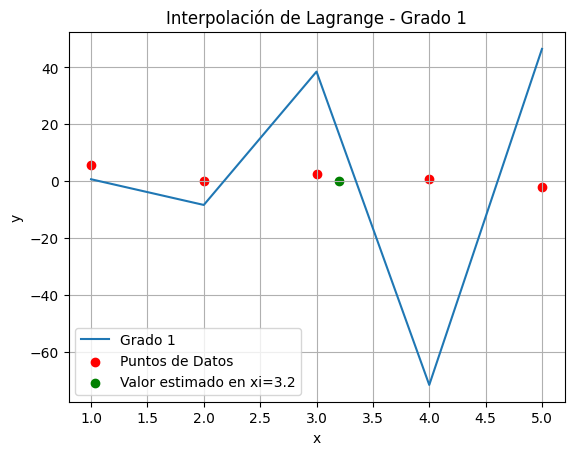

Polinomio de grado 2:
f(x)=0.6375x^4-8.408333x^3+38.5125x^2-71.741667x+46.5
Valor estimado en xi=3.2: 0.2555781250000022



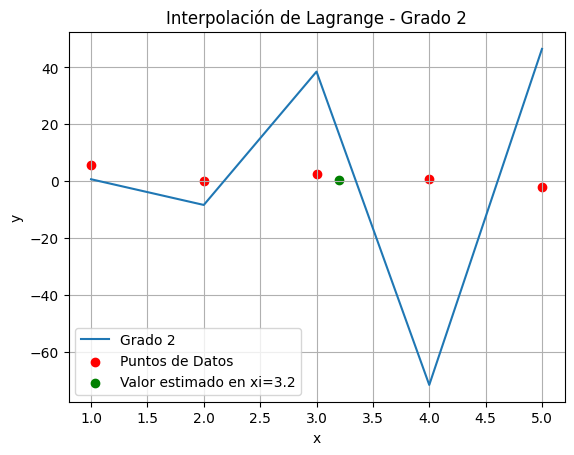

Polinomio de grado 3:
f(x)=0.6375x^4-8.408333x^3+38.5125x^2-71.741667x+46.5
Valor estimado en xi=3.2: 0.8178500000000071



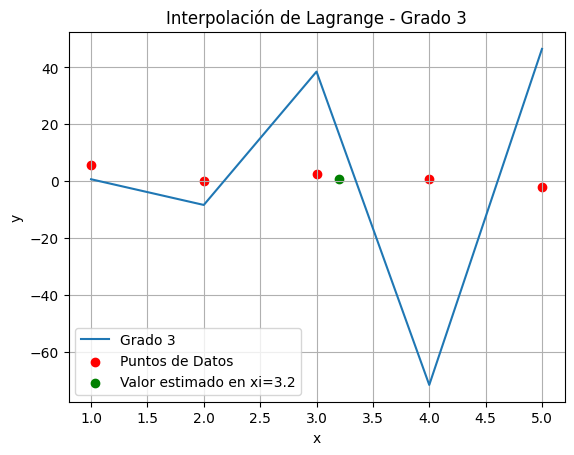

Polinomio de grado 4:
f(x)=0.6375x^4-8.408333x^3+38.5125x^2-71.741667x+46.5
Valor estimado en xi=3.2: 2.6171200000000567



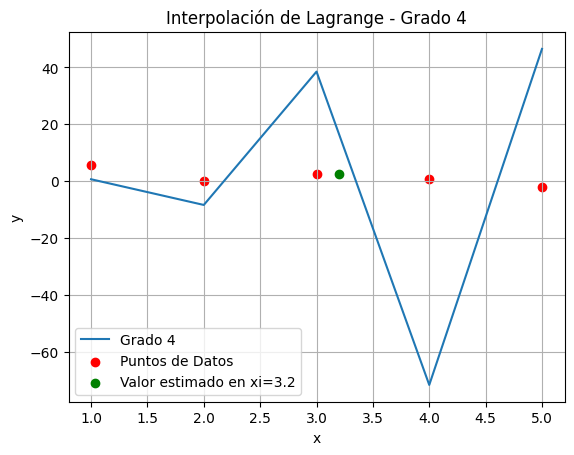

In [52]:
import matplotlib.pyplot as plt
import numpy as np
def multiplicar_polinomios(a, b):
    longitud = len(a) + len(b) - 1
    resultado = [0] * longitud

    for i in range(len(a)):
        for j in range((len(b))):
            resultado[i + j] += a[i] * b[j]

    return resultado

def imprimir_polinomio(coeficientes):
    texto = 'f(x)='
    grado = len(coeficientes) - 1
    for i in range(len(coeficientes)):
        if coeficientes[i] != 0:
            if i > 0 and coeficientes[i] >= 0:
                texto += '+'

            texto += str(round(coeficientes[i], 6))

            if grado == 1:
                texto += 'x'
            elif grado > 1:
                texto += 'x^' + str(grado)

        grado -= 1

    print(texto)

def lagrange_interpolation(x, y, xi, degree):
    n = len(x)
    polinomio = [0] * (degree + 1)

    for i in range(n):
        numerador = [1]
        denominador = 1
        for j in range(n):
            if j != i:
                numerador = multiplicar_polinomios(numerador, [1, -x[j]])
                denominador = denominador * (x[i] - x[j])

        lixfxi = []
        for k in range(len(numerador)):
            lixfxi.append(numerador[k] / denominador * y[i])

        # Ajuste del tamaño del polinomio
        if len(lixfxi) > len(polinomio):
            polinomio.extend([0] * (len(lixfxi) - len(polinomio)))

        for k in range(len(lixfxi)):
            polinomio[k] += lixfxi[k]

    return polinomio

# Datos de entrada
x = [1, 2, 3, 4, 5]
y = [5.5, 0, 2.5, 0.8, -2]
xi = 3.2

# Grados de los polinomios de interpolación de Lagrange
grados = [1, 2, 3, 4]

# Estimar y mostrar polinomios de interpolación de Lagrange y sus valores en xi
for grado in grados:
    polinomio = lagrange_interpolation(x, y, xi, grado)
    print(f"Polinomio de grado {grado}:")
    imprimir_polinomio(polinomio)
    valor_estimado = sum(coef * xi ** (grado - i) for i, coef in enumerate(polinomio))
    print(f"Valor estimado en xi={xi}: {valor_estimado}\n")

    # Crear gráfico del polinomio interpolante
    plt.figure()
    y_vals = lagrange_interpolation(x, y, x, grado)  # Evaluamos el polinomio en los mismos puntos que x
    plt.plot(x, y_vals, label=f'Grado {grado}')
    plt.scatter(x, y, color='red', label='Puntos de Datos')
    plt.scatter(xi, valor_estimado, color='green', label=f'Valor estimado en xi={xi}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolación de Lagrange - Grado {grado}')
    plt.legend()
    plt.grid(True)
    plt.show()